<a href="https://colab.research.google.com/github/muzaturezhang/ZtM-Learn-PyTorch-for-Deep-Learning/blob/main/ZtoM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.10.0+cpu'

In [ ]:
what_were_covering={1:"data(prepare and load)",
                    2:"build model",
                    3:"fitting the model to data(training)",
                    4:"making predictions and evaluating a model(interference)",
                    5:"saving and loading a model",
                    6:"putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(interference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=X*weight+bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split=int(len(X)*0.8)
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)


(40, 40, 10, 10)

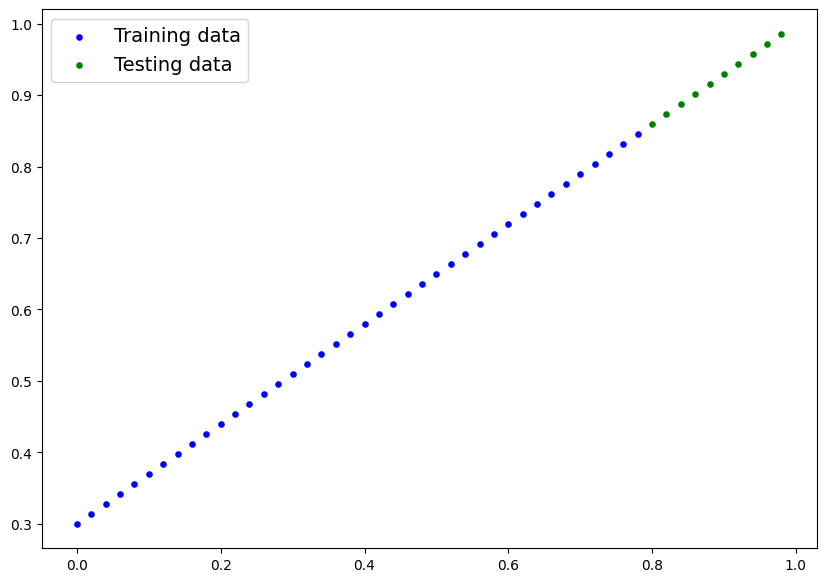

In [ ]:
def plot_predictions(train_data=X_train,train_label=Y_train,test_data=X_test,test_label=Y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=14,label="Training data")
  plt.scatter(test_data,test_label,c='g',s=14,label="Testing data")
  if predictions != None:
    plt.scatter(test_data,predictions,c='r',s=14,label="Predictions")
  plt.legend(prop={"size":14})

plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  def forward(self,x:torch.Tensor)-> torch.Tensor :
    return self.weight*x+self.bias

torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

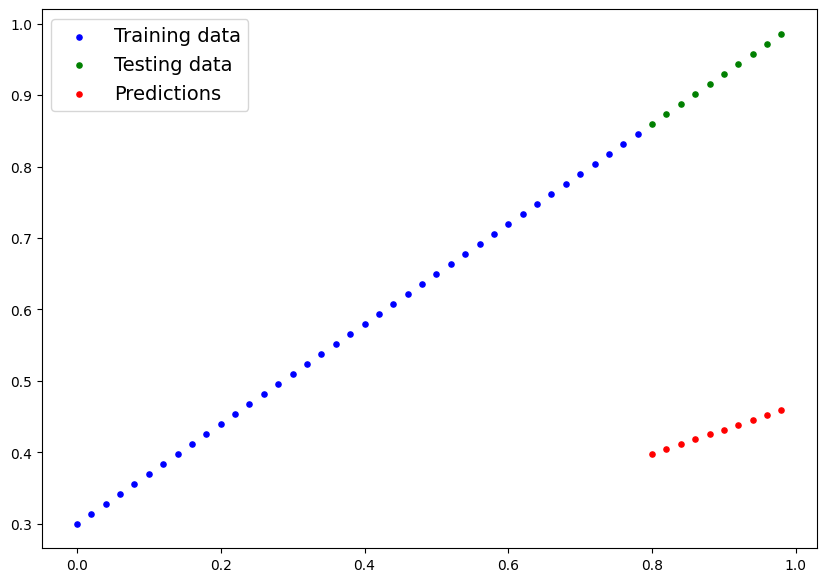

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_preds-Y_test

tensor([[-0.4618],
        [-0.4691],
        [-0.4764],
        [-0.4836],
        [-0.4909],
        [-0.4982],
        [-0.5054],
        [-0.5127],
        [-0.5200],
        [-0.5272]])

In [ ]:
torch.manual_seed(42)
epochs=100
model=LinearRegressionModel()
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
  model.train()
  y_pred=model(X_train)
  loss=loss_fn(y_pred,Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred=model(X_test)
    test_loss=loss_fn(test_pred,Y_test)

  if epoch%10==0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy)
    print(f"epochs:{epoch}|train_loss:{loss}|test_loss:{test_loss}")


epochs:0|train_loss:0.31288138031959534|test_loss:0.48106518387794495
epochs:10|train_loss:0.1976713240146637|test_loss:0.3463551998138428
epochs:20|train_loss:0.08908725529909134|test_loss:0.21729660034179688
epochs:30|train_loss:0.053148526698350906|test_loss:0.14464017748832703
epochs:40|train_loss:0.04543796554207802|test_loss:0.11360953003168106
epochs:50|train_loss:0.04167863354086876|test_loss:0.09919948130846024
epochs:60|train_loss:0.03818932920694351|test_loss:0.08886633068323135
epochs:70|train_loss:0.03476089984178543|test_loss:0.0805937647819519
epochs:80|train_loss:0.03132382780313492|test_loss:0.07232122868299484
epochs:90|train_loss:0.02788739837706089|test_loss:0.06473556160926819


In [ ]:
model.train()
y_pred=model(X_train)
loss_fn=nn.L1Loss()
loss=loss_fn(Y_train,y_pred)
loss_de=loss.detach()
print(loss_de.data_ptr)
print(loss.data_ptr)
loss_de is loss

<built-in method data_ptr of Tensor object at 0x7c0a4ff82f30>
<built-in method data_ptr of Tensor object at 0x7c0a4ff83840>


False